In [1]:
import json

import plotly.graph_objects as go
import plotly.express as px

In [2]:
MAPBOX_ACCESSTOKEN = 'pk.eyJ1IjoiZ3Jpc2FpdGlzIiwiYSI6ImNraDhnN3g2bzAyMWkycXIxamR0NXJscmgifQ.vyRCvByr3xNwonFcVco-HA'
with open('./Basic(ckhflxp6b0mbl19t7kq1r4wv5)/style.json', 'r') as read_file:
    map_style = json.load(read_file)

print(type(map_style))
print(map_style.keys())
print(type(map_style["layers"]))
# print(json.dumps(map_style["layers"][1], indent=2))

<class 'dict'>
dict_keys(['version', 'name', 'metadata', 'center', 'zoom', 'sources', 'sprite', 'glyphs', 'layers', 'created', 'modified', 'id', 'owner', 'visibility', 'draft'])
<class 'list'>


In [3]:
df = px.data.election()
geojson = px.data.election_geojson()

In [20]:
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson,
    locations=df['district_id'],
    z=df['Bergeron'],
    zmin=0,
    zmax=df.Bergeron.max(),
    below='water'
))

fig.update_layout(
    mapbox=dict(
        accesstoken=MAPBOX_ACCESSTOKEN,
#         style="mapbox://styles/grisaitis/ckhdmzzfl015419qr8h5n9dpm",
#         style='streets',
#         style="mapbox://styles/grisaitis/ckhflxp6b0mbl19t7kq1r4wv5",
#         style = 'mapbox://styles/srepho/cjttho6dl0hl91fmzwyicqkzf',
#         style='mapbox://styles/etpinard/cip93fm98000sbmnuednknloo',
#         style='mapbox://styles/grisaitis/ckhfna9il05b019oz5f6qcdzg',
#         style='mapbox://styles/mapbox/cjzeo5d850gca1cquit3q8gs0',
        style='mapbox://styles/grisaitis/ckhfna9il05b019oz5f6qcdzg/draft',
        zoom=10,
        center=dict(lat=45.48, lon=-73.60),
#         layers=[dict(
#             sourcetype='geojson',
#             source=map_style
#         )]
    ),
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

None

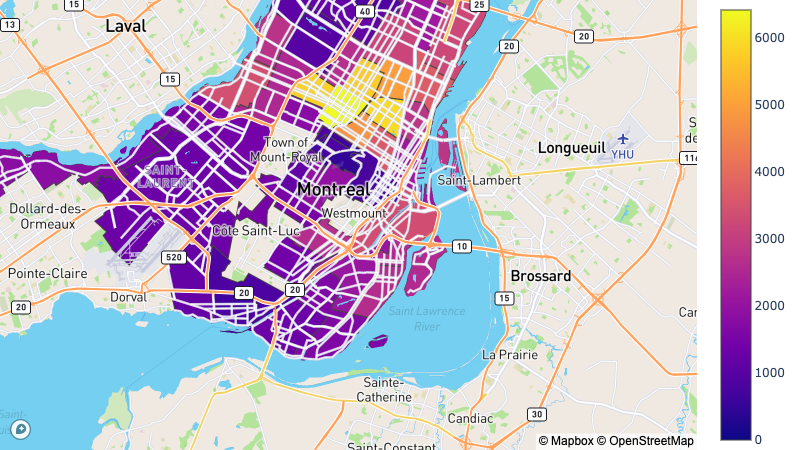

In [21]:
fig.show()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig, style={'height': '100vh'})
])

app.run_server(debug=False, use_reloader=True)  # Turn off reloader if inside Jupyter
